In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import pandas as pd
import os
import nltk
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
corpus = open("corpuss.txt").read()
corpus

"Keanggotaan Investasi Reseller Bukukita\t\nKeanggotaan Investasi Dropship Bukukita\t\nKomik Dari Twit-nya Raditya Dika\nRangkuman Tips Beriklan Selama 9 Tahun\t\nPROPERTI KOMODO \t\nPanduan Menulis Siswa Tingkat Dasar\t\nBuku Saku Kumpulan Rumus Matematika SMA IPA\t\nCahaya Di Penjuru HATI\t\nCatatan Ayahasi Ditambah-tambahin\t\nAl-Akram\t\nBuku Panduan Piala Dunia Brazil 2014\t\nRenungan Sufistik: Renungan Penentram Hati\t\nSeluas Langit Biru by Sitta Karina \t\nMasakan Timur Tengah Populer Favorit Ala Chef Salimoz\t\nCara Ampuh Menjadi Pribadi yang Diterima dan Disukai\t\nLaut Bercerita\t\nHadis Tarbawi\t\nKisah Seru Bintang Sepak Bola Muslim\t\nDi Penghujung Pelukan\t\nSukses Budidaya Jahe\t\nRisalah Shalat dan Majmu Syarir Superlengkap\t\nAl-Quran AN NUR\t\nBerbagai Hasil Pekerjaan dan Keterampilan\t\nBelajar Mewarnai Boboi Boy Edisi ke-2\t\nAL-AKHYAR\t\nKumpulan Khotbah Jumat Terbaik Sepanjang Tahun Hijriah\t\nPutri Hujan Dan Kesatria Malam\t\nBelajar Sambil Bermain\t\nAisyah Ibu

In [4]:
#preprocess the corpus
import re
data=corpus.lower()
corpus=re.sub('[^a-z0-9]+',' ', data)

In [5]:
corpus

'keanggotaan investasi reseller bukukita keanggotaan investasi dropship bukukita komik dari twit nya raditya dika rangkuman tips beriklan selama 9 tahun properti komodo panduan menulis siswa tingkat dasar buku saku kumpulan rumus matematika sma ipa cahaya di penjuru hati catatan ayahasi ditambah tambahin al akram buku panduan piala dunia brazil 2014 renungan sufistik renungan penentram hati seluas langit biru by sitta karina masakan timur tengah populer favorit ala chef salimoz cara ampuh menjadi pribadi yang diterima dan disukai laut bercerita hadis tarbawi kisah seru bintang sepak bola muslim di penghujung pelukan sukses budidaya jahe risalah shalat dan majmu syarir superlengkap al quran an nur berbagai hasil pekerjaan dan keterampilan belajar mewarnai boboi boy edisi ke 2 al akhyar kumpulan khotbah jumat terbaik sepanjang tahun hijriah putri hujan dan kesatria malam belajar sambil bermain aisyah ibu dan guru ummat muslim jahiliyah kontemporer dan hegemoni nalar kekerasan merajut isl

In [6]:
len(corpus)

206933

In [7]:
#tokenizing the text into words
tokens = word_tokenize(corpus)
tokens

['keanggotaan',
 'investasi',
 'reseller',
 'bukukita',
 'keanggotaan',
 'investasi',
 'dropship',
 'bukukita',
 'komik',
 'dari',
 'twit',
 'nya',
 'raditya',
 'dika',
 'rangkuman',
 'tips',
 'beriklan',
 'selama',
 '9',
 'tahun',
 'properti',
 'komodo',
 'panduan',
 'menulis',
 'siswa',
 'tingkat',
 'dasar',
 'buku',
 'saku',
 'kumpulan',
 'rumus',
 'matematika',
 'sma',
 'ipa',
 'cahaya',
 'di',
 'penjuru',
 'hati',
 'catatan',
 'ayahasi',
 'ditambah',
 'tambahin',
 'al',
 'akram',
 'buku',
 'panduan',
 'piala',
 'dunia',
 'brazil',
 '2014',
 'renungan',
 'sufistik',
 'renungan',
 'penentram',
 'hati',
 'seluas',
 'langit',
 'biru',
 'by',
 'sitta',
 'karina',
 'masakan',
 'timur',
 'tengah',
 'populer',
 'favorit',
 'ala',
 'chef',
 'salimoz',
 'cara',
 'ampuh',
 'menjadi',
 'pribadi',
 'yang',
 'diterima',
 'dan',
 'disukai',
 'laut',
 'bercerita',
 'hadis',
 'tarbawi',
 'kisah',
 'seru',
 'bintang',
 'sepak',
 'bola',
 'muslim',
 'di',
 'penghujung',
 'pelukan',
 'sukses',
 'budi

In [8]:
#length of the sequence to train
train_len = 3

In [9]:
#converting the data into required sequence
text_sequences = []
for i in range(train_len,len(tokens)+1):
  seq = tokens[i-train_len:i]
  text_sequences.append(seq)

In [10]:
text_sequences

[['keanggotaan', 'investasi', 'reseller'],
 ['investasi', 'reseller', 'bukukita'],
 ['reseller', 'bukukita', 'keanggotaan'],
 ['bukukita', 'keanggotaan', 'investasi'],
 ['keanggotaan', 'investasi', 'dropship'],
 ['investasi', 'dropship', 'bukukita'],
 ['dropship', 'bukukita', 'komik'],
 ['bukukita', 'komik', 'dari'],
 ['komik', 'dari', 'twit'],
 ['dari', 'twit', 'nya'],
 ['twit', 'nya', 'raditya'],
 ['nya', 'raditya', 'dika'],
 ['raditya', 'dika', 'rangkuman'],
 ['dika', 'rangkuman', 'tips'],
 ['rangkuman', 'tips', 'beriklan'],
 ['tips', 'beriklan', 'selama'],
 ['beriklan', 'selama', '9'],
 ['selama', '9', 'tahun'],
 ['9', 'tahun', 'properti'],
 ['tahun', 'properti', 'komodo'],
 ['properti', 'komodo', 'panduan'],
 ['komodo', 'panduan', 'menulis'],
 ['panduan', 'menulis', 'siswa'],
 ['menulis', 'siswa', 'tingkat'],
 ['siswa', 'tingkat', 'dasar'],
 ['tingkat', 'dasar', 'buku'],
 ['dasar', 'buku', 'saku'],
 ['buku', 'saku', 'kumpulan'],
 ['saku', 'kumpulan', 'rumus'],
 ['kumpulan', 'rumus

In [11]:
#converting the texts into integer sequence
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)
sequences

[[3032, 658, 3033],
 [658, 3033, 2010],
 [3033, 2010, 3032],
 [2010, 3032, 658],
 [3032, 658, 3034],
 [658, 3034, 2010],
 [3034, 2010, 66],
 [2010, 66, 9],
 [66, 9, 3035],
 [9, 3035, 1208],
 [3035, 1208, 3036],
 [1208, 3036, 3037],
 [3036, 3037, 730],
 [3037, 730, 282],
 [730, 282, 3038],
 [282, 3038, 1525],
 [3038, 1525, 175],
 [1525, 175, 112],
 [175, 112, 2011],
 [112, 2011, 1526],
 [2011, 1526, 21],
 [1526, 21, 43],
 [21, 43, 2012],
 [43, 2012, 847],
 [2012, 847, 99],
 [847, 99, 11],
 [99, 11, 1209],
 [11, 1209, 51],
 [1209, 51, 221],
 [51, 221, 105],
 [221, 105, 53],
 [105, 53, 176],
 [53, 176, 378],
 [176, 378, 3],
 [378, 3, 3039],
 [3, 3039, 26],
 [3039, 26, 222],
 [26, 222, 3040],
 [222, 3040, 3041],
 [3040, 3041, 3042],
 [3041, 3042, 7],
 [3042, 7, 2013],
 [7, 2013, 11],
 [2013, 11, 21],
 [11, 21, 1210],
 [21, 1210, 23],
 [1210, 23, 3043],
 [23, 3043, 524],
 [3043, 524, 731],
 [524, 731, 2014],
 [731, 2014, 731],
 [2014, 731, 991],
 [731, 991, 26],
 [991, 26, 3044],
 [26, 3044

In [12]:
# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token5.pkl', 'wb'))

In [13]:
sequences=np.asarray(sequences)
sequences[:10]

array([[3032,  658, 3033],
       [ 658, 3033, 2010],
       [3033, 2010, 3032],
       [2010, 3032,  658],
       [3032,  658, 3034],
       [ 658, 3034, 2010],
       [3034, 2010,   66],
       [2010,   66,    9],
       [  66,    9, 3035],
       [   9, 3035, 1208]])

In [14]:
#vocabulary size
vocabulary_size = len(tokenizer.word_index)+1
print(vocabulary_size)

6855


In [15]:
X = []
y = []

for i in sequences:
    X.append(i[0:2])
    y.append(i[2])
    
X = np.array(X)
y = np.array(y)

In [16]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[3032  658]
 [ 658 3033]
 [3033 2010]
 [2010 3032]
 [3032  658]
 [ 658 3034]
 [3034 2010]
 [2010   66]
 [  66    9]
 [   9 3035]]
Response:  [3033 2010 3032  658 3034 2010   66    9 3035 1208]


In [17]:
y = to_categorical(y, num_classes=vocabulary_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
model = Sequential()
model.add(Embedding(vocabulary_size, 10, input_length=2))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(512))
# model.add(Dense(1000))
model.add(Dense(vocabulary_size, activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 10)             68550     
                                                                 
 lstm (LSTM)                 (None, 2, 128)            71168     
                                                                 
 lstm_1 (LSTM)               (None, 512)               1312768   
                                                                 
 dense (Dense)               (None, 6855)              3516615   
                                                                 
Total params: 4,969,101
Trainable params: 4,969,101
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Untuk melakukan penghentian otomatis pelatihan
from keras.callbacks import TensorBoard, EarlyStopping
callback = EarlyStopping(monitor = 'loss', patience = 1, mode = 'min', restore_best_weights = True)

In [21]:
# Compile model
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model data
train = model.fit(X, y, epochs=50, callbacks=[callback], verbose=1)

Epoch 1/50
975/975 [==============================] - 92s 84ms/step - loss: 7.9662 - accuracy: 0.0341
Epoch 2/50
975/975 [==============================] - 86s 88ms/step - loss: 7.5299 - accuracy: 0.0344
Epoch 3/50
975/975 [==============================] - 85s 87ms/step - loss: 7.3040 - accuracy: 0.0354
Epoch 4/50
975/975 [==============================] - 85s 87ms/step - loss: 7.0731 - accuracy: 0.0413
Epoch 5/50
975/975 [==============================] - 87s 89ms/step - loss: 6.7862 - accuracy: 0.0497
Epoch 6/50
975/975 [==============================] - 96s 99ms/step - loss: 6.4528 - accuracy: 0.0612
Epoch 7/50
975/975 [==============================] - 102s 104ms/step - loss: 6.0450 - accuracy: 0.0793
Epoch 8/50
975/975 [==============================] - 87s 89ms/step - loss: 5.5793 - accuracy: 0.0967
Epoch 9/50
975/975 [==============================] - 90s 93ms/step - loss: 5.0791 - accuracy: 0.1182
Epoch 10/50
975/975 [==============================] - 86s 89ms/step - loss: 4.5

In [22]:
# Membuat fungsi untuk menampilkan plot hasil akurasi
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt 
def draw_plot(data, type_data):
  mpl.style.use('seaborn')
  plt.figure(figsize = (20, 5))
  plt.plot(data,'darkblue', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel(type_data)
  plt.legend()

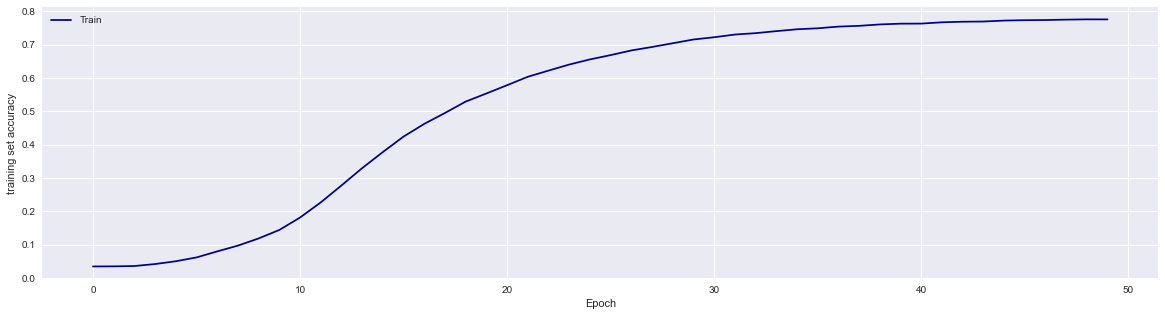

In [23]:
# Menampilkan plot akurasi
draw_plot(train.history['accuracy'],'training set accuracy' )

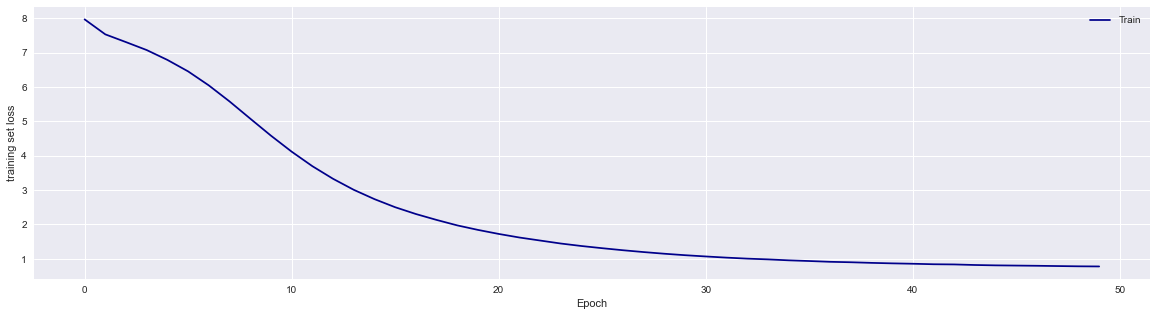

In [24]:
# Menampilkan plot loss
draw_plot(train.history['loss'],'training set loss' )

In [25]:
# Menyimpan model
model.save('model5.h5', train)

In [26]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('model5.h5')
tokenizer = pickle.load(open('token5.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = [ ]
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [27]:
while(True):
    text = input("Enter your line: ")
    
    if text == "end":
        print("Execution completed.....")
        break
    
    else:
        try:
            text = text.split(" ")
            text = text[-3:]
            print(text)
          
            for i in range(3): #menampilkan 5 prediksi kata berikutnya
                predicted_word = Predict_Next_Words(model, tokenizer, text)
                print(predicted_word)
                text.append(predicted_word)
                text = text[-3:]
                
        except Exception as e:
            print("Error occurred: ",e)
            continue


Enter your line: AL QURAN
['AL', 'QURAN']
1/1 [==============================] - 1s 1s/step
dan
dan
1/1 [==============================] - 1s 1s/step
doa
doa
1/1 [==============================] - 0s 30ms/step
gambar
gambar
Enter your line: end
Execution completed.....


In [28]:
while(True):
  text = input("Enter your line: ")
  
  if text == "end":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: end
Execution completed.....
